<a href="https://colab.research.google.com/github/288756/VisArtificial/blob/master/cdatos_spacy_alumnos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuración del entorno


# Carga de datos

Carga el primer libro en una variable `str`.

In [13]:
!file /content/hp1

/content/hp1: Unicode text, UTF-8 text, with very long lines (995), with CRLF line terminators


In [ ]:
corpus = ""
ruta_archivo = "/content/hp1"

with open(ruta_archivo, "r", encoding="utf8") as archivo:
  for i in range(15):
    archivo.readline()
  corpus = archivo.read().replace("\x97", "-")

print(corpus[3000:])

## Extracción de sentencias

Crea una lista de `str`, donde cada elemento se corresponda con una frase del libro.

In [ ]:
# Importa spaCy
import spacy
!python -m spacy download es_core_news_md

In [22]:
# Crea un objeto nlp vacío para procesar español
nlp = spacy.load("es_core_news_md")

In [31]:
doc = nlp("Como Juan es fan de Harry Potter, quiere hacer un procesador de textos usando SpaCy que reconozca cosas como, por ejemplo, hechizos")

In [32]:
from spacy import displacy
displacy.render(doc, style="ent")

In [15]:

texto = "Imaginemos que este es el texto del libro. Y nosotros queremos dividirlo en frases. Porque vamos a considerar que cada frase es un documento."
doc = nlp(texto)

ValueError: [E030] Sentence boundaries unset. You can add the 'sentencizer' component to the pipeline with: `nlp.add_pipe('sentencizer')`. Alternatively, add the dependency parser or sentence recognizer, or set sentence boundaries by setting `doc[i].is_sent_start`.

In [37]:
doc = nlp(corpus)
sentencias = list(doc.sents)
print(len(sentencias))

6469


In [38]:
for i, sent in enumerate(sentencias[20:100]):
  print(f"{i} -- {sent}")

0 -- Al llegar a la esquina percibió el primer indicio de que sucedía algo raro: un gato estaba mirando un plano de la ciudad.
1 -- Durante un segundo, el señor Dursley no se dio cuenta de lo que había visto, pero luego volvió la cabeza para mirar otra vez.
2 -- Sí había un gato atigrado en la esquina de Privet Drive, pero no vio ningún plano.
3 -- ¿En qué había estado pensando?
4 -- Debía de haber sido una ilusión óptica.
5 -- El señor Dursley parpadeó y contempló al gato.
6 -- Éste le devolvió la mirada.
7 -- Mientras el señor Dursley daba la vuelta a la esquina y subía por la calle, observó al gato por el espejo retrovisor: en aquel momento el felino estaba leyendo el rótulo que decía «Privet Drive» (no podía ser, los gatos no saben leer los rótulos ni los planos).
8 -- El señor Dursley meneó la cabeza y alejó al gato de sus pensamientos.
9 -- Mientras iba a la ciudad en coche no pensó más que en los pedidos de taladros que esperaba conseguir aquel día.

10 -- Pero en las afueras oc

In [40]:
type(sentencias[30])

spacy.tokens.span.Span

# ¿Qué personaje es el más nombrado?

Cuenta cuántas veces se nombra a Harry, Ron y Hermione de forma individual.

In [7]:
personajes = {
    "Harry": "#008000", # Verde esmeralda
    "Ron": "#ff4500", # Naranja rojizo
    "Hermione": "#4b0082", # Índigo
}

In [49]:
from os.path import split
from collections import Counter
contador_personajes = Counter(palabra for sentencia in sentencias for palabra in sentencia.text.split() if palabra in personajes)
contador_personajes

Counter({'Harry': 898, 'Ron': 216, 'Hermione': 159})

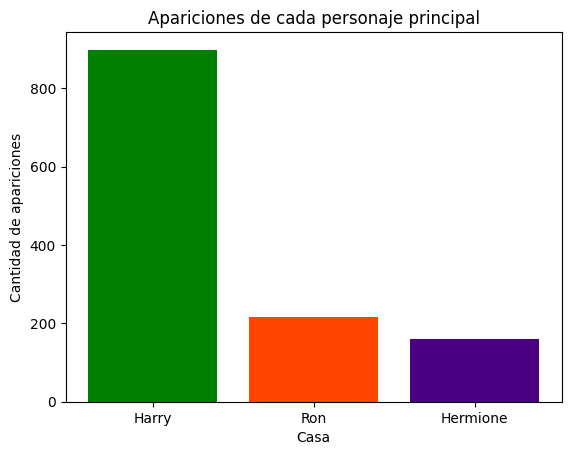

In [50]:
import matplotlib.pyplot as plt

# Etiquetas y valores para el gráfico
etiquetas = list(contador_personajes.keys())
valores = list(contador_personajes.values())

# Crear el gráfico de barras
plt.bar(etiquetas, valores, color=[personajes[personaje] for personaje in etiquetas])

# Añadir título y etiquetas a los ejes
plt.title("Apariciones de cada personaje principal")
plt.xlabel("Casa")
plt.ylabel("Cantidad de apariciones")

# Mostrar el gráfico
plt.show()

## Adjetivos más utilizados

In [51]:
adjetivos = [token.text for token in doc if token.pos_ == "ADJ"]

conteo_adjetivos = Counter(adjetivos)
conteo_adjetivos.most_common(10)

[('gran', 78),
 ('mejor', 71),
 ('primer', 42),
 ('siguiente', 42),
 ('primera', 40),
 ('nuevo', 35),
 ('seguro', 30),
 ('grande', 29),
 ('pequeño', 27),
 ('verde', 25)]

## Adjetivos más utilizados con cada personaje

In [59]:
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

personajes_principales = ["Harry", "Ron", "Hermione"]
personajes_principales_patrones = nlp.pipe(personajes_principales)

matcher = PhraseMatcher(nlp.vocab)
matcher.add("PROTA", None, *personajes_principales_patrones)

def funcion_detecta_prota(doc):
  # Aplicar el matcher al doc
  matches = matcher(doc)
  # Para cada coincidencia ceo un objeto span y en el doc principal identifico
  # que esa coincidencia es una entidad de tipo "PROTAGONISTA"
  spans = [Span(doc, start, end, "PROTAGONISTA") for match_id, start, end in matches]
  doc.ents = spans
  return doc
print(doc.ents)

(Harry Potter and the, Stone

, Alicia Dellepiane


Copyright © J.K. Rowling, Copyright © Emecé Editores, El Copyright, Marca Registrada, Harry Potter, Warner Bros, Emecé Editores España, S.A.
Mallorca, Barcelona, Tel, Depósito legal: B-36.730-2000

1ª edición, Printed in Spain, Jessica, Anne, Di, El señor y la señora Dursley, Privet Drive, Dursley, Grunnings, Era un hombre corpulento y rollizo, La señora Dursley, Los Dursley, Dudley, Dursley, Potter.
, La señora Potter, Dursley, Dursley, Dursley, Dursley, Potter, Sabían, Potter, El niño, Potter, Dudley, Dursley, El señor Dursley, Dursley, Dudley, Dursley, Dursley, Dudley, Tunante, Dursley, Se metió en su coche, Dursley, Sí había un gato atigrado, Privet Drive, El señor Dursley, Éste, Mientras el señor Dursley, Privet Drive, El señor Dursley, Individuos, El señor Dursley, ¡Ah, Tamborileó, Cuchicheaban, El señor Dursley, Vamos, Sí, El tráfico avanzó, Dursley, Grunnings, Dursley, No vio las lechuzas, La mayoría de aquellas personas, Sin 

## Adjetivos más utilizados con cada personaje

# Fragmentación de textos

In [ ]:
text = """Este es un texto con capítulos.

Capítulo 1: La introducción del libro... esto sería el título.

Este es el contenido del primer capítulo. Se trata de un texto que quiero que sea un poco largo para poder probar cosas de la asignatura que estamos cursando en uniovi para detectar entidades en textos.

Capítulo 2: El desarrollo

Y este es el contenido del segundo capítulo. Podemos referenciar al "Capítulo 1" porque su contenido fue interesante. Este la es más corto"""


In [ ]:
text = """Este es un texto con capítulos.

1

El título del capítulo

Este es el contenido del capitulo que estamos intentando analizar. Su contenido será almacenado posteriormente así que estoy escribiendo una frase larga para poder analizarlo.

Capítulo 1: Escribo esto como si fuera un capítulo pero no lo es.

2

El título del segundo capítulo

De nuevo, este es el contenido del capitulo que estamos intentando analizar. Su contenido será almacenado posteriormente así que estoy escribiendo una frase larga para poder analizarlo.

22

Otro capítulo

Este capítulo tiene un número con más de un dígito así que a ver si funciona.
"""


# Entrenamiento de modelo para pronosticar hechizos

# Trabajo autónomo

## ¿Qué casa es la más nombrada?

In [ ]:
casas = {
    "Gryffindor": "#b81b1b",
    "Hufflepuff": "#ffcf40",
    "Ravenclaw": "#0070b8",
    "Slytherin": "#008000",
}

## ¿En qué frases aparece Revenclaw?

## Obtén los adjetivos que tienen una casa como raíz de la frase



## Obtén las frases en las que aparece cada casa

## Busca los sustantivos más utilizados en el texto

## Divide el libro por capítulos

## Entrena un modelo para detectar las entidades relativas a animales y criaturas fantásticas que aprecen en en libro

## [PA] Ejercicio de participación activa

Plantea una pregunta que requiera utilizar SpaCy, del estilo de las que has resuelto hasta ahora, y presenta la solución.

Para realizar esta presentación, tienes que (obviamente) realizar el código pero **no puedes presentar código**. Lo que harás será 1) plantear una pregunta 2) describir cómo lo has hecho haciendo referencia a los pasos y los tipos de los objetos involucrados 3) presentar los resultados en forma de gráfico, diccionario, lista...

# Enlace con libros:

https://github.com/busiris2014/7506Condor1C2014/tree/master/datos2011/trunk/libros